# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [6]:
from src.make_db import create_movies_db

In [7]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [25]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

In [26]:
cur.execute('''SELECT * FROM rotten_tomatoes_movies''')
rotten_tomatoes = pd.read_sql('''SELECT * FROM rotten_tomatoes_movies''', conn)

In [27]:
rt_genres = rotten_tomatoes.drop_duplicates('movie_title')

In [130]:
rt_genres['status_counts'] = rt_genres['tomatometer_status'].map({'Rotten': 0, 'Fresh': 1, 'Certified-Fresh': 2,})

<ipython-input-130-c7b5472d8b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_genres['status_counts'] = rt_genres['tomatometer_status'].map({'Rotten': 0, 'Fresh': 1, 'Certified-Fresh': 2,})


In [76]:
rt_genres['tomatometer_status'].value_counts()

Rotten             7272
Fresh              6647
Certified-Fresh    3144
Name: tomatometer_status, dtype: int64

In [12]:
#rt_genres['genres'] = rt_genres['genres'].str.split(',')
rt_genres_split = rt_genres.explode('genres', ignore_index=False)

In [55]:
rt_genres_split.drop('tomatometer_count', axis=1, inplace=True)

In [132]:
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('tH', 't H')

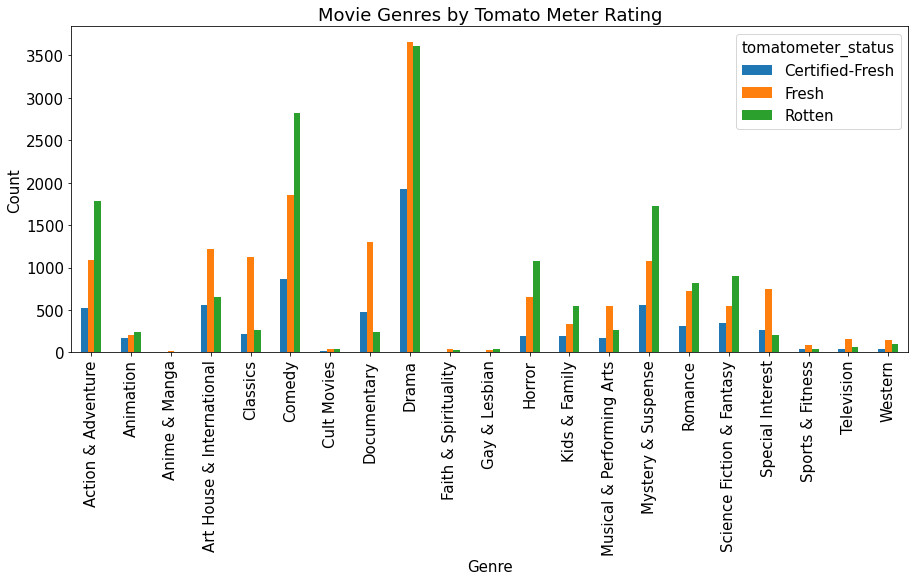

In [134]:
plt.rcParams.update({'font.size': 15})
rt_genres_split.groupby(['genres', 'tomatometer_status'])\
.count()\
.iloc[:,:1]\
.reset_index()\
.pivot(index='genres', columns='tomatometer_status', values='movie_title').plot(kind='bar', figsize=(15,6), title='Movie Genres by Tomato Meter Rating', ylabel='Count', xlabel='Genre');

In [114]:
rt_genres_split.groupby(['genres', 'tomatometer_status'])\
.count()\
.iloc[:,:1]\
.reset_index()\
.pivot(index='genres', columns='tomatometer_status', values='movie_title').index

Index(['Action & Adventure', 'Animation', 'Anime & Manga',
       'ArtHouse & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith & Spirituality', 'Gay & Lesbian',
       'Horror', 'Kids & Family', 'Musical & PerformingArts',
       'Mystery & Suspense', 'Romance', 'ScienceFiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object', name='genres')

In [57]:
rt_genres_cfresh = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Certified-Fresh']
rt_genres_fresh = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Fresh']
rt_genres_rotten = rt_genres_split.loc[rt_genres['tomatometer_status']== 'Rotten']

In [58]:
rt_genres_cfresh.head(2)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,runtime,tomatometer_status,tomatometer_rating,audience_rating
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Certified-Fresh,87.0,64.0
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,Classics,Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Certified-Fresh,100.0,97.0


In [59]:
rt_genres_fresh.head(2)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,runtime,tomatometer_status,tomatometer_rating,audience_rating
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,Comedy,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",122.0,Fresh,67.0,53.0
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,Romance,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",122.0,Fresh,67.0,53.0


In [60]:
rt_genres_rotten.head(2)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,runtime,tomatometer_status,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,Action & Adventure,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,Rotten,49.0,53.0
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,Comedy,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,Rotten,49.0,53.0


In [87]:
rt_genres_cfresh.groupby(['genres', ]).count()

,movie_title,movie_info,critics_consensus,content_rating,directors,authors,actors,runtime,tomatometer_status,tomatometer_rating,audience_rating
genres,,,,,,,,,,,
Animation,59,57,59,59,57,57,59,57,59,59,59
Anime & Manga,4,4,4,4,4,3,4,4,4,4,4
Art House & International,95,94,92,95,94,91,95,94,95,95,95
Classics,62,62,62,62,62,62,62,62,62,62,62
Comedy,311,307,301,311,307,302,309,307,311,311,311
Cult Movies,12,12,12,12,11,10,12,12,12,12,12
Documentary,65,65,60,65,64,35,62,65,65,65,65
Drama,1119,1114,1093,1119,1113,1084,1115,1117,1119,1119,1119
Faith & Spirituality,4,4,4,4,4,2,4,4,4,4,4


In [62]:
rt_genres_fresh.groupby('genres').describe()

runtime                                             \
                             count        mean        std   min    25%    50%   
genres                                                                          
 Animation                    79.0   87.696203  12.885446  61.0  76.00   87.0   
 Anime & Manga                12.0  104.333333  12.942764  85.0  93.00  110.0   
 Art House & International   211.0  107.137441  19.255304  71.0  95.00  103.0   
 Classics                    357.0  106.450980  24.567174   8.0  91.00  102.0   
 Comedy                      815.0  102.280982  18.323957  45.0  91.00  100.0   
 Cult Movies                  37.0   91.648649  14.744521  67.0  82.00   90.0   
 Documentary                 208.0   92.379808  21.173655  39.0  83.75   90.0   
 Drama                      2429.0  105.841499  21.267439  15.0  93.00  102.0   
 Faith & Spirituality         42.0  102.333333  22.804222  74.0  86.25   98.0   
 Gay & Lesbian                30.0   95.166667  15.031194  70.0  88.00   93.0   
 Horror                      407.0   93.471744  14.271939  63.0  85.00   92.0   
 Kids & Family               303.0   93.475248  20.888030   8.0  83.00   93.0   
 Musical & Performing Arts   511.0  100.647750  23.137212  39.0  87.00   96.0   
 Mystery & Suspense         1005.0  101.919403  16.504692  15.0  91.00  100.0   
 Romance                     712.0  107.443820  19.650811  57.0  95.00  104.0   
 Science Fiction & Fantasy   520.0   99.300000  18.562460  48.0  87.00   97.0   
 Special Interest            726.0   91.085399  19.876679  39.0  82.00   90.0   
 Sports & Fitness             81.0   95.407407  16.641648  44.0  87.00   94.0   
 Television                  140.0   97.064286  26.514069   8.0  86.00   92.5   
 Western                     146.0  106.732877  18.515340  73.0  93.00  103.0   
Action & Adventure          1066.0  105.818949  19.767761  40.0  92.00  103.0   
Animation                    105.0   82.019048  18.092700   8.0  76.00   83.0   
Art House & International    980.0  105.442857  23.150125  15.0  92.00  100.0   
Classics                     760.0  105.002632  21.400072  57.0  92.00  102.0   
Comedy                       961.0   96.911550  13.355144  13.0  89.00   95.0   
Cult Movies                    8.0   93.000000  21.494185  79.0  79.75   85.5   
Documentary                 1045.0   90.135885  18.951509  21.0  82.00   90.0   
Drama                       1174.0  104.315162  17.527944  65.0  92.00  101.0   
Horror                       239.0   93.694561  14.128269  47.0  85.50   92.0   
Kids & Family                 15.0   96.133333  22.752917  48.0  87.50   92.0   
Musical & Performing Arts     16.0  109.375000  24.135382  72.0  92.25  104.5   
Mystery & Suspense            60.0   99.183333  15.526349  72.0  88.00   95.5   
Romance                        6.0   97.500000   3.391165  92.0  96.25   97.5   
Science Fiction & Fantasy     12.0   93.416667  28.040420   8.0  93.75  103.0   
Special Interest               2.0  101.500000  16.263456  90.0  95.75  101.5   
Western                        2.0   98.500000  17.677670  86.0  92.25   98.5   

                                          tomatometer_rating             ...  \
                               75%    max              count       mean  ...   
genres                                                                   ...   
 Animation                   96.50  121.0               86.0  80.465116  ...   
 Anime & Manga              111.00  124.0               12.0  81.000000  ...   
 Art House & International  116.00  180.0              218.0  81.000000  ...   
 Classics                   119.00  183.0              358.0  84.678771  ...   
 Comedy                     110.00  209.0              825.0  80.496970  ...   
 Cult Movies                 96.00  129.0               37.0  76.729730  ...   
 Documentary                 98.00  210.0              214.0  83.121495  ...   
 Drama                      115.00  254.0             2462.0  80.51

In [63]:
rt_genres_rotten.groupby('genres').describe()

runtime                                             \
                             count        mean        std   min    25%    50%   
genres                                                                          
 Animation                    96.0   87.843750   9.897717  66.0  80.00   88.0   
 Anime & Manga                 3.0   97.333333  15.947832  79.0  92.00  105.0   
 Art House & International   148.0  103.628378  18.116509  70.0  90.00   99.0   
 Classics                    101.0  116.267327  28.951301  63.0  94.00  110.0   
 Comedy                      763.0   99.180865  14.889402  63.0  90.00   97.0   
 Cult Movies                  32.0   93.562500  11.152716  67.0  87.25   93.0   
 Documentary                  52.0   96.826923  20.384270  59.0  86.50   92.0   
 Drama                      1960.0  104.880102  17.529423  46.0  93.00  102.0   
 Faith & Spirituality         29.0  108.931034  23.240868  82.0  96.00  102.0   
 Gay & Lesbian                38.0   91.631579  10.236187  71.0  86.25   91.0   
 Horror                      513.0   94.653021  12.708130  40.0  88.00   92.0   
 Kids & Family               529.0   93.264650  13.673059  39.0  86.00   92.0   
 Musical & Performing Arts   257.0  103.949416  20.472384   5.0  91.00  103.0   
 Mystery & Suspense         1541.0  101.296561  13.950364  22.0  92.00   99.0   
 Romance                     799.0  105.816020  16.824688  63.0  95.00  103.0   
 Science Fiction & Fantasy   876.0  101.206621  16.618874  22.0  90.00   98.0   
 Special Interest            197.0   95.167513  18.607036  39.0  85.00   91.0   
 Sports & Fitness             45.0  100.444444  12.162826  64.0  91.00  102.0   
 Television                   58.0   95.534483  11.705772  62.0  90.00   95.0   
 Western                     100.0  110.820000  24.141577  74.0  95.75  105.5   
Action & Adventure          1773.0  103.866328  16.754187  66.0  92.00  100.0   
Animation                    140.0   85.635714  13.942952   5.0  76.00   86.0   
Art House & International    498.0  103.700803  19.077013  22.0  91.00  100.0   
Classics                     167.0  108.479042  27.786587  58.0  90.00  104.0   
Comedy                      2030.0   97.610345  11.004699  60.0  90.00   96.0   
Cult Movies                   12.0   94.000000  17.994949  62.0  88.75   90.5   
Documentary                  183.0   90.300546  14.144558  39.0  83.00   89.0   
Drama                       1619.0  104.074737  14.132254  40.0  94.00  103.0   
Horror                       551.0   93.754991   9.687285  28.0  88.00   92.0   
Kids & Family                 18.0   97.055556  14.714827  76.0  88.00   96.0   
Musical & Performing Arts      6.0  110.500000  18.436377  86.0  99.00  109.0   
Mystery & Suspense           173.0   99.699422  13.400011  77.0  90.00   97.0   
Romance                        8.0  108.875000  22.793718  89.0  93.00  103.0   
Science Fiction & Fantasy     18.0  103.055556  13.985170  87.0  92.75  101.0   
Television                     1.0   88.000000        NaN  88.0  88.00   88.0   
Western                        4.0  100.500000  12.069245  88.0  95.50   98.5   

                                          tomatometer_rating             ...  \
                               75%    max              count       mean  ...   
genres                                                                   ...   
 Animation                   94.00  115.0               96.0  35.083333  ...   
 Anime & Manga              106.50  108.0                3.0  32.000000  ...   
 Art House & International  112.00  156.0              148.0  35.797297  ...   
 Classics                   132.00  208.0              101.0  37.930693  ...   
 Comedy                     106.00  179.0              770.0  32.100000  ...   
 Cult Movies                102.25  120.0               32.0  38.093750  ...   
 Documentary                101.25  175.0               53.0  39.905660  ...   
 Drama                      113.00  243.0             1976.0  34.69

In [83]:
rt_genres_cfresh.value_counts

<bound method DataFrame.value_counts of                            movie_title  \
1                          Please Give   
3      12 Angry Men (Twelve Angry Men)   
3      12 Angry Men (Twelve Angry Men)   
6                         The 39 Steps   
6                         The 39 Steps   
...                                ...   
17699                       Zombieland   
17699                       Zombieland   
17708                         Zootopia   
17708                         Zootopia   
17708                         Zootopia   

                                              movie_info  \
1      Kate (Catherine Keener) and her husband Alex (...   
3      Following the closing arguments in a murder tr...   
3      Following the closing arguments in a murder tr...   
6      While on vacation in London, Canadian Richard ...   
6      While on vacation in London, Canadian Richard ...   
...                                                  ...   
17699  After a virus turns most peo

In [71]:
y_cfresh = rt_genres_cfresh['genres'].values

array(['Comedy', 'Classics', ' Drama', ..., 'Action & Adventure',
       ' Animation', ' Comedy'], dtype=object)

TypeError: 'value' must be an instance of str or bytes, not a NoneType

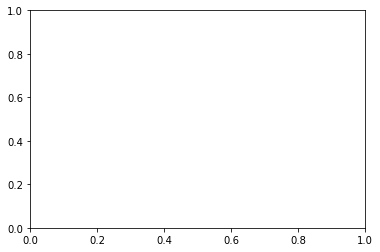

In [95]:
rt_genres_cfresh_fig, rt_genres_cfresh_ax = plt.subplots()
rt_genres_cfresh_ax.bar(x_cfresh, y_cfresh)

In [7]:
movie_budgets = pd.read_sql('''SELECT * FROM tn_movie_budgets''', conn)

In [8]:
movie_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [77]:
tmdb = pd.read_sql('''SELECT * FROM tmdb_movies''', conn)

In [88]:
new_tmdb = tmdb.drop_duplicates('title')

In [89]:
new_tmdb.sort_values('popularity', ascending=False)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
19838,19838,[],451240,en,Brazey,0.600,2016-10-16,Brazey,10.0,1
19837,19837,"[878, 99]",451572,en,Star Trek: Inside The Roddenberry Vault,0.600,2016-12-05,Star Trek: Inside The Roddenberry Vault,10.0,1
19836,19836,[99],453904,en,Strine Life,0.600,2016-05-15,Strine Life,10.0,2
19835,19835,[],456224,en,Kreep,0.600,2016-06-01,Kreep,10.0,1


In [90]:
x = new_tmdb.sort_values('popularity', ascending=False).head(50).title.values
y = new_tmdb.sort_values('popularity', ascending=False).head(50).popularity

<ipython-input-91-4a46130c6eda>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90);


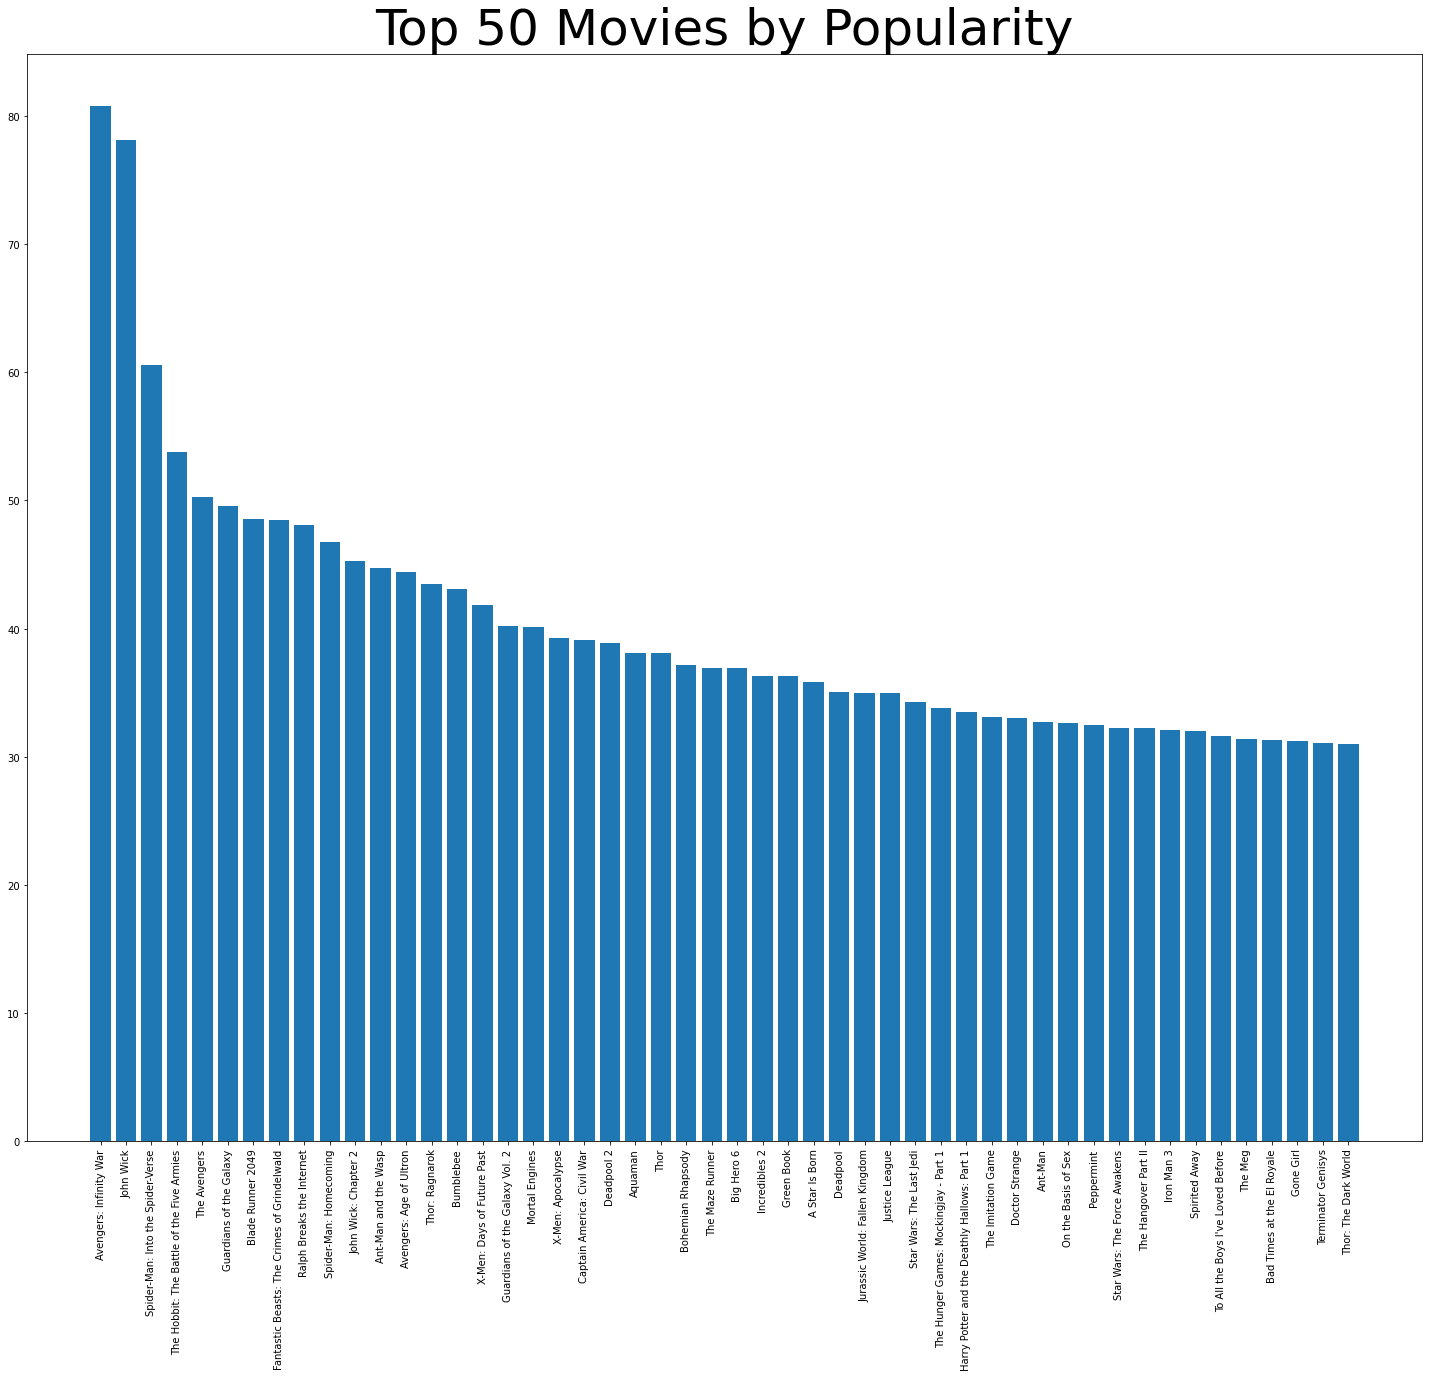

In [91]:
fig, ax = plt.subplots(figsize=(25,20))
ax.bar(x, y)
ax.set_title('Top 50 Movies by Popularity', fontsize=50)
ax.set_xticklabels(x, rotation=90);

In [13]:
movie_gross = pd.read_sql('''SELECT * FROM bom_movie_gross''', conn)

In [14]:
movie_gross.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [178]:
three_tables = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie''', conn)

In [29]:
new_three_tables = three_tables.set_index('genres')

In [67]:
fifty_popular_gross = new_three_tables.drop_duplicates().sort_values('popularity', ascending=False)[:100]

In [68]:
fifty_popular_gross

,primary_title,popularity,production_budget,worldwide_gross
genres,,,,
"Action,Adventure,Sci-Fi",Avengers: Infinity War,80.773,"$300,000,000","$2,048,134,200"
"Action,Crime,Thriller",John Wick,78.123,"$30,000,000","$76,235,001"
"Adventure,Fantasy",The Hobbit: The Battle of the Five Armies,53.783,"$250,000,000","$945,577,621"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$225,000,000","$1,517,935,897"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$60,000,000","$48,585,416"
...,...,...,...,...
"Adventure,Family,Fantasy",Percy Jackson & the Olympians: The Lightning T...,26.691,"$95,000,000","$223,050,874"
Horror,Avatar,26.526,"$425,000,000","$2,776,345,279"
"Crime,Drama,History",Child 44,26.386,"$50,000,000","$8,004,221"


In [70]:
x2 = fifty_popular_gross['popularity'].index
y2 = fifty_popular_gross['popularity'].values

<ipython-input-94-1d596daf4b5a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x2, rotation=90)


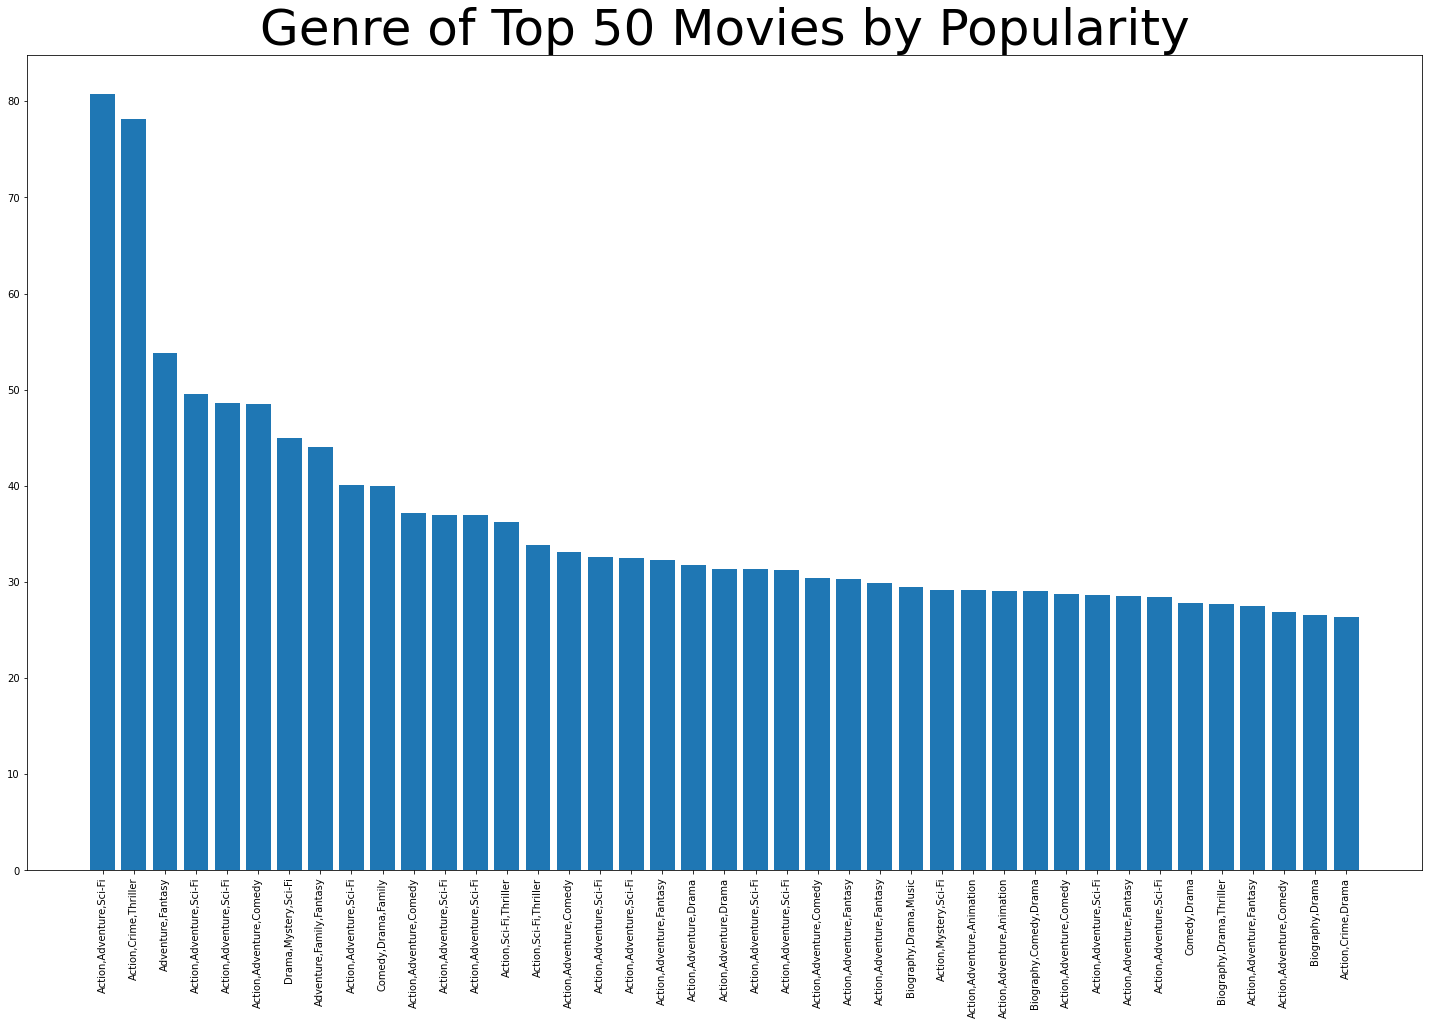

In [94]:
fig2, ax2 = plt.subplots(figsize=(25,15))
ax2.bar(x2, y2);
ax2.set_xticklabels(x2, rotation=90)
ax2.set_title('Genre of Top 50 Movies by Popularity', fontsize=50);

In [97]:
new_three_tables.groupby('genres')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,43.0,5.146488,5.579299,0.600,0.60000,1.4000,9.52850,17.243
"Action,Adventure",2.0,8.840000,1.723926,7.621,8.23050,8.8400,9.44950,10.059
"Action,Adventure,Animation",17.0,18.824588,10.634472,2.707,11.98100,16.2480,27.10600,36.920
"Action,Adventure,Biography",9.0,14.459111,6.951869,0.600,14.33000,16.7860,19.41000,19.900
"Action,Adventure,Comedy",30.0,21.392400,13.921713,0.600,9.72675,20.8860,26.15775,49.606
...,...,...,...,...,...,...,...,...
Sci-Fi,14.0,5.885643,8.361281,0.600,0.60000,2.0535,8.83300,31.618
"Sci-Fi,Thriller",6.0,2.641167,3.107087,0.600,0.86525,1.8680,2.07725,8.833
Sport,2.0,3.539000,3.678369,0.938,2.23850,3.5390,4.83950,6.140


In [101]:
new_three_tables.groupby('genres')['worldwide_gross'].describe()

,count,unique,top,freq
genres,,,,
Action,43,24,$0,6
"Action,Adventure",2,2,"$11,774",1
"Action,Adventure,Animation",17,16,"$652,127,828",2
"Action,Adventure,Biography",9,5,"$221,297,061",2
"Action,Adventure,Comedy",30,25,"$64,240,813",2
...,...,...,...,...
Sci-Fi,14,7,$0,5
"Sci-Fi,Thriller",6,5,"$64,240,813",2
Sport,2,1,"$5,745,503",2


In [113]:
three_tables_no_duplicates = new_three_tables.drop_duplicates()

In [172]:
three_tables_no_duplicates_sorted = three_tables_no_duplicates.sort_values('worldwide_gross', ascending=False)

In [174]:
three_tables_no_duplicates_sorted.value_counts()

primary_title               popularity  production_budget  worldwide_gross
xXx: Return of Xander Cage  21.749      $85,000,000        $345,033,359       1
Identity                    0.600       $28,000,000        $82,183,683        1
Heist                       0.600       $35,000,000        $28,906,817        1
                                        $8,900,000         $3,324,131         1
                            7.554       $35,000,000        $28,906,817        1
                                                                             ..
Step Up 3D                  17.174      $30,000,000        $165,889,117       1
Step Up Revolution          10.925      $33,000,000        $165,552,290       1
Steve Jobs                  8.895       $30,000,000        $35,579,007        1
Still Alice                 10.747      $5,000,000         $41,699,612        1
#Horror                     6.099       $1,500,000         $0                 1
Length: 2054, dtype: int64

In [136]:
bins = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]

In [147]:
binned_data = pd.cut(three_tables_no_duplicates_sorted['popularity'], bins)

In [148]:
binned_data

genres
Action,Adventure,Sci-Fi    (80, 85]
Action,Crime,Thriller      (75, 80]
Adventure,Fantasy          (50, 55]
Action,Adventure,Sci-Fi    (50, 55]
Action,Adventure,Sci-Fi    (50, 55]
                             ...   
Drama,Fantasy               (0, 10]
Drama                       (0, 10]
Documentary                 (0, 10]
Comedy                      (0, 10]
Documentary                 (0, 10]
Name: popularity, Length: 2054, dtype: category
Categories (16, interval[int64]): [(0, 10] < (10, 15] < (15, 20] < (20, 25] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [156]:
three_tables_no_duplicates_sorted['rating_bin'] = binned_data

In [157]:
three_tables_no_duplicates_sorted

,primary_title,popularity,production_budget,worldwide_gross,rating_bin
genres,,,,,
"Action,Adventure,Sci-Fi",Avengers: Infinity War,80.773,"$300,000,000","$2,048,134,200","(80, 85]"
"Action,Crime,Thriller",John Wick,78.123,"$30,000,000","$76,235,001","(75, 80]"
"Adventure,Fantasy",The Hobbit: The Battle of the Five Armies,53.783,"$250,000,000","$945,577,621","(50, 55]"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$225,000,000","$1,517,935,897","(50, 55]"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$60,000,000","$48,585,416","(50, 55]"
...,...,...,...,...,...
"Drama,Fantasy",Animals,0.600,"$5,500,000",$0,"(0, 10]"
Drama,Crossroads,0.600,"$12,000,000","$57,000,000","(0, 10]"
Documentary,They Will Have to Kill Us First,0.600,"$600,000","$7,943","(0, 10]"


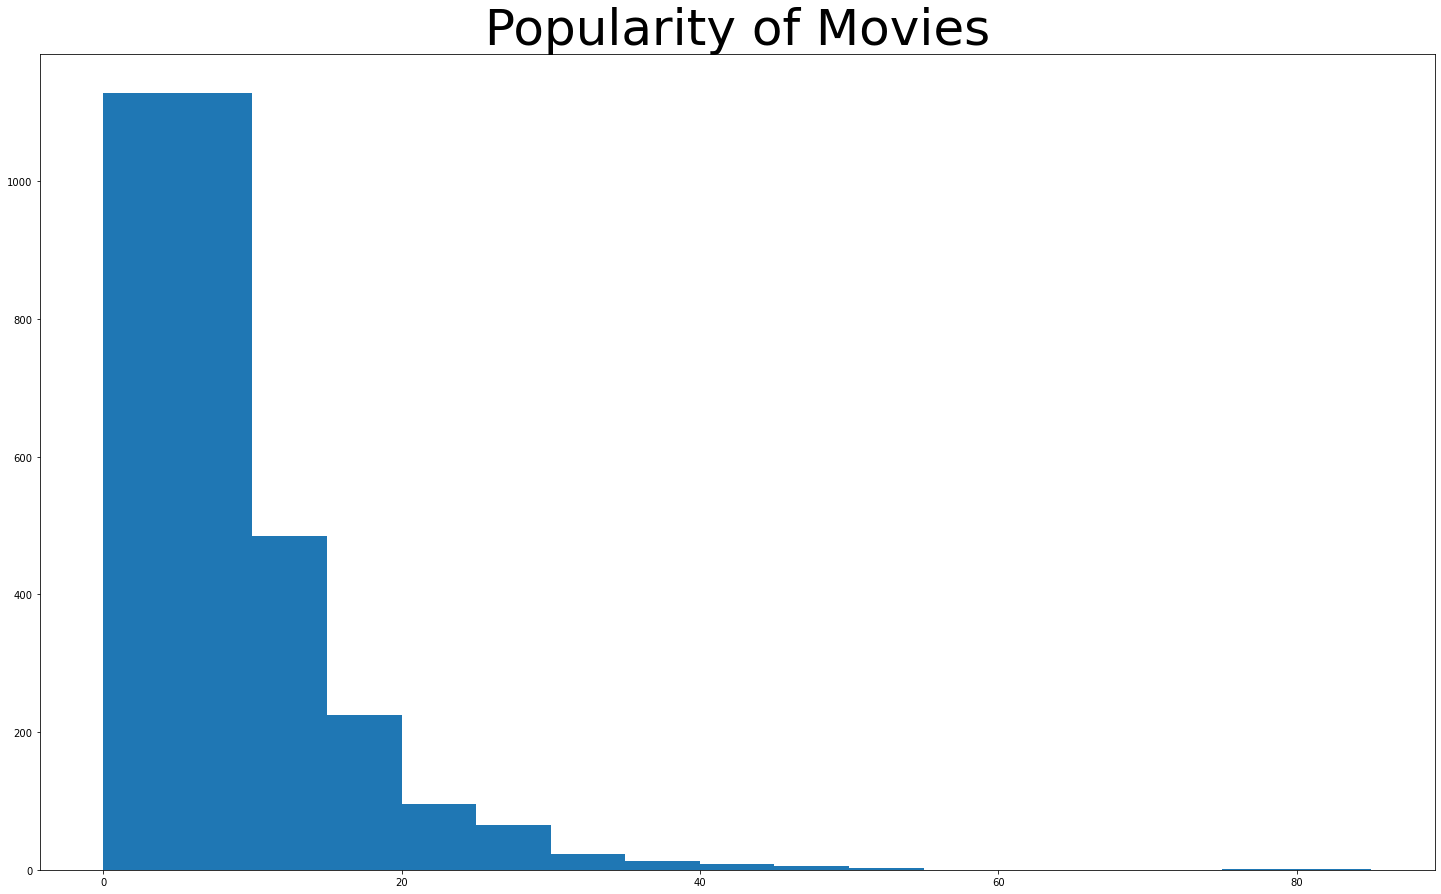

In [165]:
fig3, ax3 = plt.subplots(figsize=(25,15))
ax3.hist(three_tables_no_duplicates_sorted['popularity'],bins = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85] )
ax3.set_title('Popularity of Movies', fontsize =50);

In [199]:
three_tables_pop_money = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE worldwide_gross > "$50,000,000"
                AND popularity > 30''', conn)

In [200]:
three_tables_pop_money.drop_duplicates('primary_title')

,primary_title,genres,popularity,production_budget,worldwide_gross
0,The Hangover Part II,"Comedy,Mystery",32.266,"$80,000,000","$586,464,305"
1,Thor: The Dark World,"Action,Adventure,Fantasy",31.014,"$150,000,000","$644,602,516"
2,John Wick,"Action,Crime,Thriller",78.123,"$30,000,000","$76,235,001"
3,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",53.783,"$250,000,000","$945,577,621"
4,Guardians of the Galaxy,"Action,Adventure,Comedy",49.606,"$170,000,000","$770,867,516"
5,X-Men: Days of Future Past,"Action,Adventure,Sci-Fi",41.867,"$200,000,000","$747,862,775"
6,Big Hero 6,"Action,Adventure,Animation",36.920,"$165,000,000","$652,127,828"
7,The Hunger Games: Mockingjay - Part 1,"Action,Adventure,Sci-Fi",33.837,"$125,000,000","$766,575,131"
9,Ant-Man,"Action,Adventure,Comedy",32.715,"$130,000,000","$518,858,449"
10,Spectre,"Action,Adventure,Thriller",30.318,"$300,000,000","$879,620,923"


In [282]:
three_tables_pop = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE popularity < 15''', conn)

In [228]:
three_tables_pop_15 = three_tables_pop.drop_duplicates('primary_title').sort_values('popularity', ascending=False)

In [255]:
three_tables_pop_15['worldwide_gross'] = three_tables_pop_15.worldwide_gross.str.replace(',','')
three_tables_pop_15['worldwide_gross'] = three_tables_pop_15.worldwide_gross.str.replace('$','')

In [256]:
three_tables_pop_15

,primary_title,genres,popularity,production_budget,worldwide_gross
1180,RED 2,"Action,Comedy,Crime",14.994,"$84,000,000",141507355
825,Wrath of the Titans,"Action,Adventure,Fantasy",14.991,"$150,000,000",305270083
1654,Neighbors,Comedy,14.979,"$18,000,000",270944428
2137,Alvin and the Chipmunks: The Road Chip,"Adventure,Animation,Comedy",14.973,"$90,000,000",249517956
1181,Parker,"Action,Crime,Thriller",14.950,"$35,000,000",48543388
...,...,...,...,...,...
367,Your Highness,"Adventure,Comedy,Fantasy",0.600,"$50,000,000",26121638
2666,Graduation Day,Thriller,0.600,"$250,000",23894000
327,Vampires,"Comedy,Fantasy,Horror",0.600,"$20,000,000",20268825
317,No Man's Land,"Adventure,Crime,Drama",0.600,"$1,000,000",2684207


In [304]:
x4 = three_tables_pop_15.primary_title.values[:50]

In [305]:
y4 = sorted(three_tables_pop_15.worldwide_gross.values[:50].astype(int))

In [306]:
y4

[12758799,
 14341016,
 16481405,
 18945682,
 19054534,
 42411721,
 43226146,
 48543388,
 51695362,
 54323210,
 62758010,
 63129909,
 70883171,
 76200721,
 81150788,
 88069880,
 89758389,
 98230839,
 98837872,
 122737201,
 130673154,
 132493015,
 140783360,
 141507355,
 169590606,
 175863783,
 185736412,
 188657593,
 202812429,
 211562435,
 216562312,
 217194805,
 217986320,
 229155503,
 231771716,
 245724600,
 249517956,
 251499665,
 263880341,
 267816276,
 270944428,
 286896578,
 305270083,
 306900902,
 318146162,
 348902025,
 416168316,
 487519809,
 531514650,
 556016627]

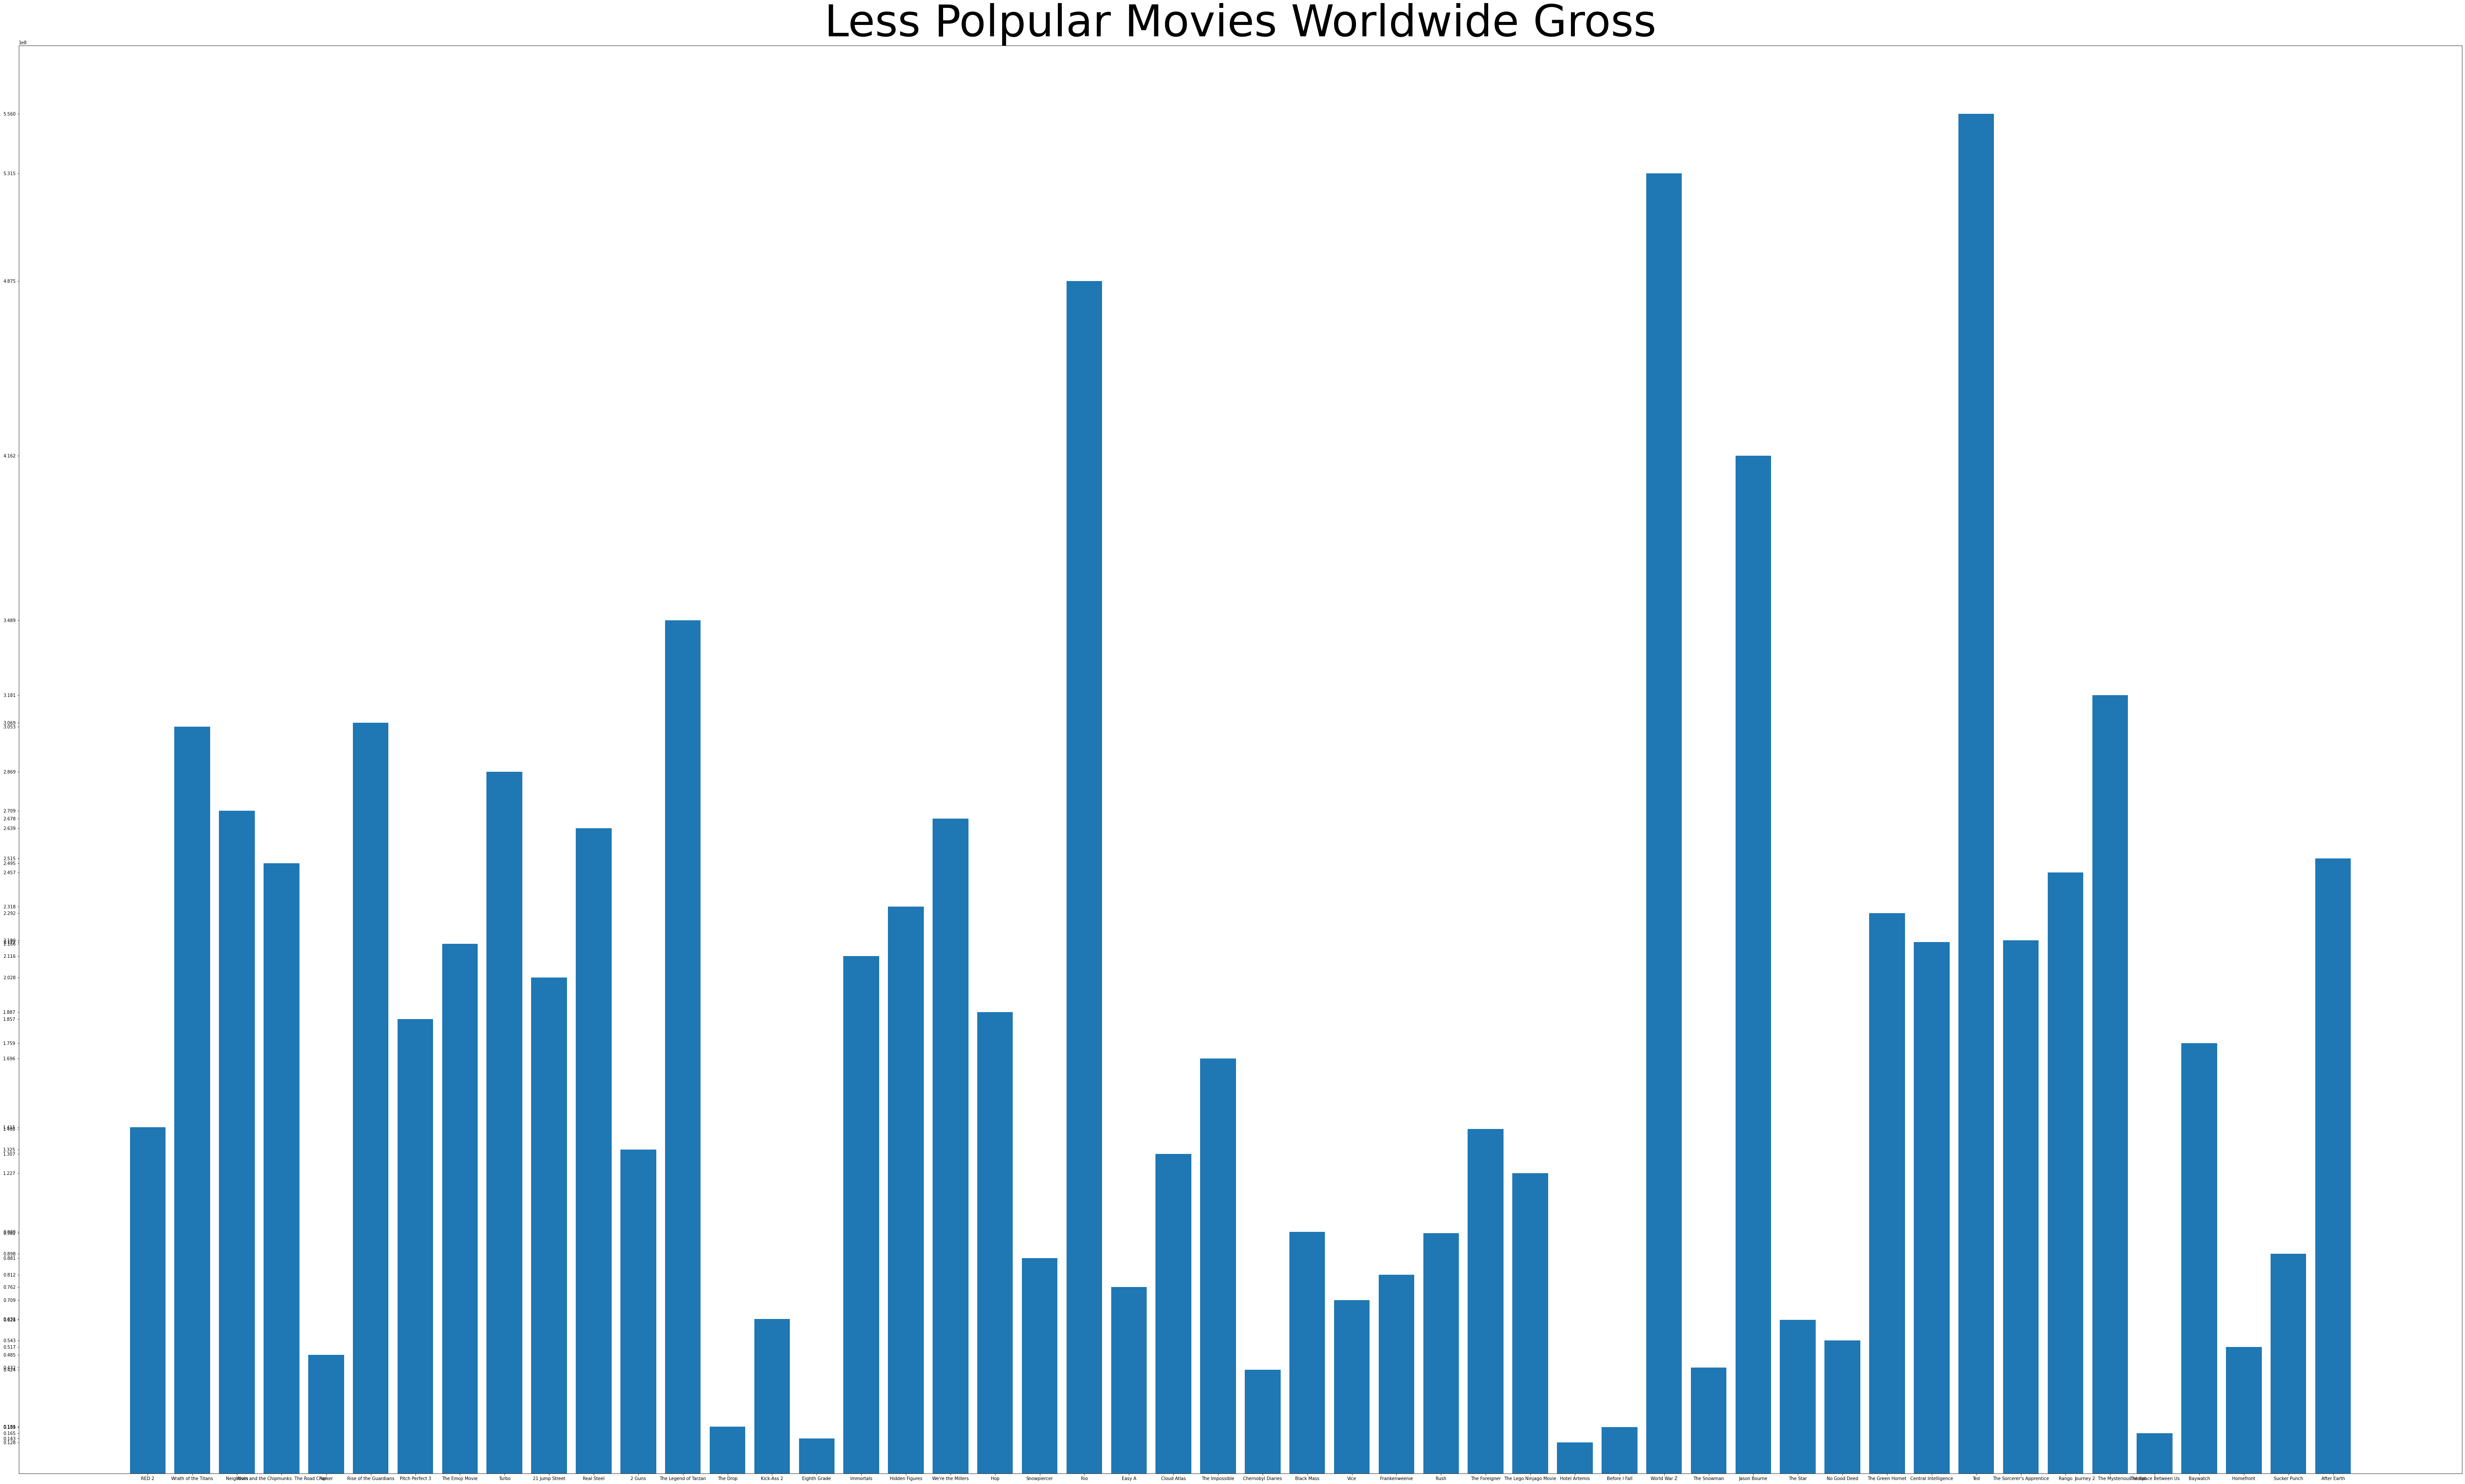

In [307]:
fig4, ax4 = plt.subplots(figsize=(100,60))
ax4.bar(x4, three_tables_pop_15.worldwide_gross.values[:50].astype(int))
ax4.set_yticks(y4)
ax4.set_title('Less Polpular Movies Worldwide Gross', fontsize=100);

In [207]:
three_tables_no_duplicates.sort_values('popularity', ascending=False)

,primary_title,popularity,production_budget,worldwide_gross
genres,,,,
"Action,Adventure,Sci-Fi",Avengers: Infinity War,80.773,"$300,000,000","$2,048,134,200"
"Action,Crime,Thriller",John Wick,78.123,"$30,000,000","$76,235,001"
"Adventure,Fantasy",The Hobbit: The Battle of the Five Armies,53.783,"$250,000,000","$945,577,621"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$225,000,000","$1,517,935,897"
"Action,Adventure,Sci-Fi",The Avengers,50.289,"$60,000,000","$48,585,416"
...,...,...,...,...
"Drama,Fantasy",Animals,0.600,"$5,500,000",$0
Drama,Crossroads,0.600,"$12,000,000","$57,000,000"
Documentary,They Will Have to Kill Us First,0.600,"$600,000","$7,943"


In [334]:
three_tables_pop30 = pd.read_sql('''SELECT primary_title, genres, popularity, production_budget, worldwide_gross
                FROM imdb_title_basics 
                JOIN tmdb_movies on primary_title=title 
                JOIN tn_movie_budgets on primary_title=movie
                WHERE popularity > 30''', conn)

In [335]:
three_tables_pop30 = three_tables_pop30.drop_duplicates('primary_title').sort_values('popularity', ascending=False)

In [336]:
three_tables_pop30['worldwide_gross'] = three_tables_pop30.worldwide_gross.str.replace(',','')
three_tables_pop30['worldwide_gross'] = three_tables_pop30.worldwide_gross.str.replace('$','')

In [337]:
three_tables_pop30

,primary_title,genres,popularity,production_budget,worldwide_gross
41,Avengers: Infinity War,"Action,Adventure,Sci-Fi",80.773,"$300,000,000",2048134200
7,John Wick,"Action,Crime,Thriller",78.123,"$30,000,000",76235001
8,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",53.783,"$250,000,000",945577621
3,The Avengers,"Action,Adventure,Sci-Fi",50.289,"$225,000,000",1517935897
9,Guardians of the Galaxy,"Action,Adventure,Comedy",49.606,"$170,000,000",770867516
25,Blade Runner 2049,"Drama,Mystery,Sci-Fi",48.571,"$185,000,000",259357408
43,Fantastic Beasts: The Crimes of Grindelwald,"Adventure,Family,Fantasy",48.508,"$200,000,000",652220086
26,Spider-Man: Homecoming,"Action,Adventure,Sci-Fi",46.775,"$175,000,000",880166350
27,Logan,"Action,Drama,Sci-Fi",45.000,"$127,000,000",615461394
44,Ant-Man and the Wasp,"Action,Adventure,Comedy",44.729,"$130,000,000",623144660


In [338]:
x5 = three_tables_pop30.primary_title.values[:50]

In [331]:
x5

array(['Avengers: Infinity War', 'John Wick',
       'The Hobbit: The Battle of the Five Armies', 'The Avengers',
       'Guardians of the Galaxy', 'Blade Runner 2049',
       'Fantastic Beasts: The Crimes of Grindelwald',
       'Spider-Man: Homecoming', 'Logan', 'Ant-Man and the Wasp',
       'Avengers: Age of Ultron', 'Black Panther', 'Venom',
       'Thor: Ragnarok', 'Bumblebee', 'X-Men: Days of Future Past',
       'Mortal Engines', 'Robin Hood', 'X-Men: Apocalypse',
       'Captain America: Civil War', 'Deadpool 2', 'Aquaman', 'Thor',
       'Bohemian Rhapsody', 'The Maze Runner', 'Big Hero 6',
       'Incredibles 2', 'Green Book', 'Deadpool',
       'Jurassic World: Fallen Kingdom', 'Justice League',
       'The Hunger Games: Mockingjay - Part 1', 'The Mule',
       'The Imitation Game', 'Doctor Strange', 'Ant-Man',
       'On the Basis of Sex', 'Peppermint', 'The Hangover Part II',
       'Iron Man 3', 'Beauty and the Beast', 'Wonder Woman', 'The Meg',
       'Bad Times at the 

In [339]:
y5 = sorted(three_tables_pop30.worldwide_gross.values[:50].astype(int))

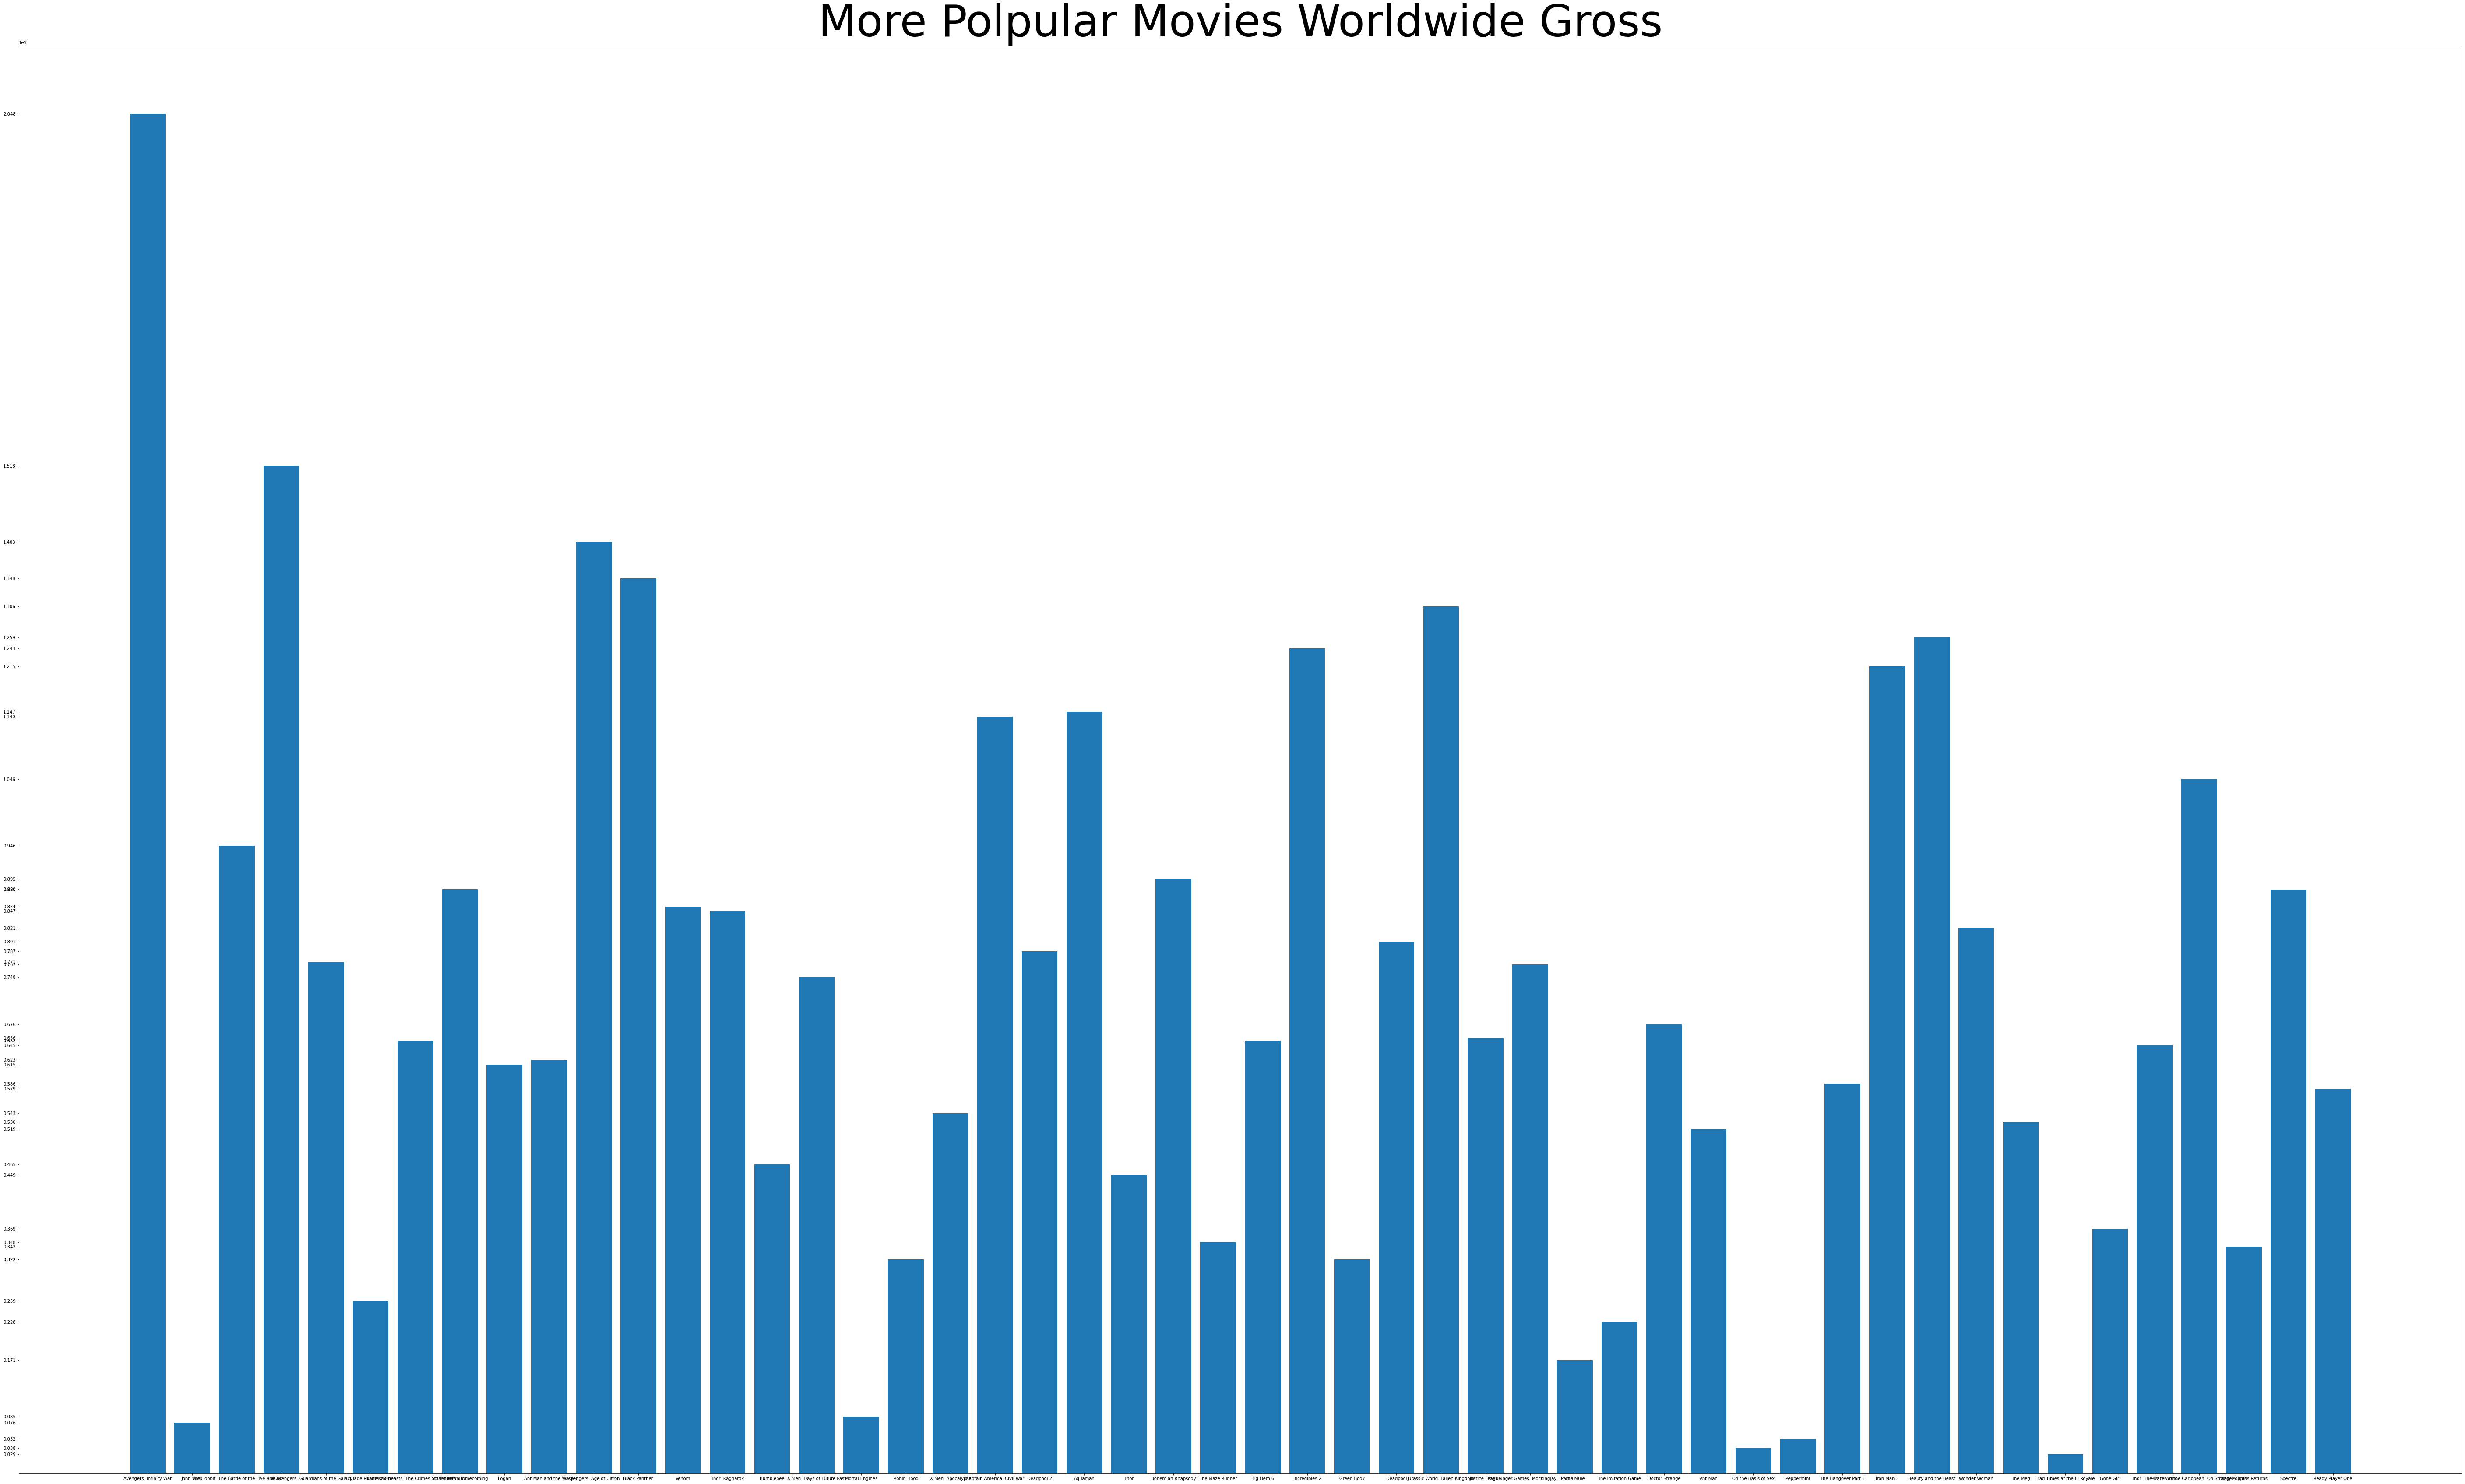

In [340]:
fig5, ax5 = plt.subplots(figsize=(100,60))
ax5.bar(x5, three_tables_pop30.worldwide_gross.values[:50].astype(int))
ax5.set_yticks(y5)
ax5.set_title('More Polpular Movies Worldwide Gross', fontsize=100);

In [350]:
corrpop = new_three_tables.popularity.values
corrgross = new_three_tables.worldwide_gross.values

np.corrcoef(corrpop, corrgross)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [344]:
new_three_tables.popularity.values

array([ 4.705,  6.576,  8.919, ...,  8.964,  0.6  , 14.01 ])

In [353]:
new_three_tables['worldwide_gross'] = new_three_tables.worldwide_gross.str.replace(',','')
new_three_tables['worldwide_gross'] = new_three_tables.worldwide_gross.str.replace('$','')
new_three_tables.worldwide_gross

genres
Action,Animation,Comedy        73706
NaN                          1165996
Adventure,Drama,Romance      9313302
Adventure,Comedy,Drama     187861183
Action,Crime,Drama          62108587
                             ...    
Drama                       10551417
Drama                       10551417
Comedy                       1110511
Documentary                165720921
Documentary                165720921
Name: worldwide_gross, Length: 4550, dtype: object

In [11]:
pd.read_sql('''SELECT *
                FROM imdb_title_ratings
                JOIN imdb_title_principals
                ON tconst
                ''', conn)

DatabaseError: Execution failed on sql 'SELECT *
                FROM imdb_title_ratings
                JOIN imdb_title_principals
                ON "tconst"
                ': ambiguous column name: tconst